In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8,4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
data_final = pd.read_csv('data_final.csv', sep=',')
data_final.head()

,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
1,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
2,ST,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,...,0.302849,0.302844,0.302840,0.302837,0.302833,0.302830,0.302828,0.302826,0.302824,0.302823
3,ST,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,...,0.303099,0.303094,0.303089,0.303085,0.303081,0.303078,0.303075,0.303073,0.303071,0.303069
4,ST,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,...,0.302595,0.302591,0.302588,0.302585,0.302582,0.302579,0.302577,0.302575,0.302574,0.302573


<AxesSubplot:xlabel='exoplanet_type', ylabel='count'>

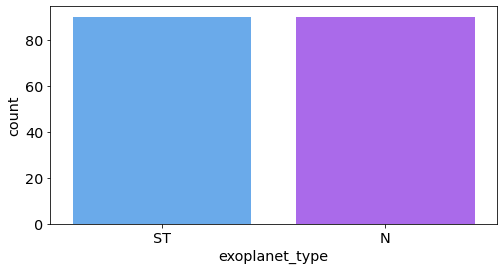

In [5]:
# Balance dataset
sns.countplot(x='exoplanet_type', data=data_final, palette='cool')

In [6]:
# Data 
X_data = data_final[data_final.columns[1:]]
y_data = data_final.exoplanet_type # label

X_data.head()

,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,0.34111413185408535,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
1,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
2,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,...,0.302849,0.302844,0.302840,0.302837,0.302833,0.302830,0.302828,0.302826,0.302824,0.302823
3,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,0.300037,...,0.303099,0.303094,0.303089,0.303085,0.303081,0.303078,0.303075,0.303073,0.303071,0.303069
4,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,0.300115,...,0.302595,0.302591,0.302588,0.302585,0.302582,0.302579,0.302577,0.302575,0.302574,0.302573


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((126, 3000), (54, 3000), (126,), (54,))

# Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [8]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 20)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.grid()
    plt.legend()

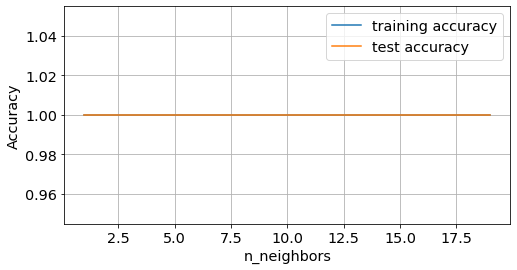

In [9]:
graph_neighbors(X_train, y_train, X_test, y_test)

In [10]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=[4,5], 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [11]:
best_param = model(X_train, y_train)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
Mejor score 1.0


# Modelo final

In [12]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
               xticklabels=['ST', 'N'],
               yticklabels=['ST', 'N'])
    plt.title('Matriz de confusión')
    plt.xlabel('Categoría real')
    plt.ylabel('Categoría Predicha')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test.astype("category").cat.codes)
    plt.legend(handles=plot.legend_elements()[0], labels=['ST', 'N'])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Primeros dos componenetes principales")
    plt.grid()
    plt.show()
    
    return p

Train set Accuracy:  1.0
Test set Accuracy:  1.0
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        27
          ST       1.00      1.00      1.00        27

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[1. 1. 1. 1. 1.]
cv_scores mean:1.0


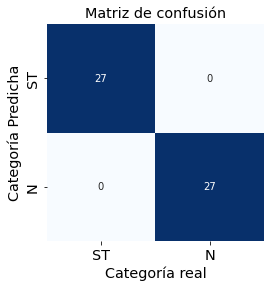

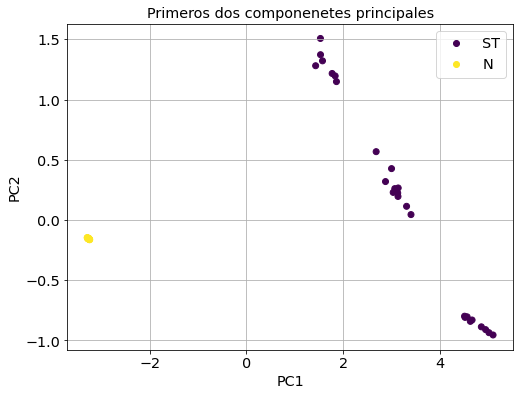

In [13]:
pred_vis = train_test_model(X_train, 
                            y_train, 
                            X_test, 
                            y_test, 
                            y_data, 
                            best_param)